<a href="https://colab.research.google.com/github/krystoliz/TemanPuan/blob/main/support_vector_machine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DATASET LABELLING KASUS PATRIARKI

---




In [ ]:
# membaca dataset
import pandas as pd
data = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/dataset/Hasil-LabelingVaderSentiment.xlsx")


In [ ]:
data=data.drop('image_url', axis=1)

In [ ]:
data=data.drop('in_reply_to_screen_name', axis=1)

In [ ]:
data=data.drop('location', axis=1)

In [ ]:
#info dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13692 entries, 0 to 13691
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            13692 non-null  int64  
 1   full_text_translated  13692 non-null  object 
 2   Compound_Score        13692 non-null  float64
 3   Sentiments            13692 non-null  object 
 4   full_text             13692 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 535.0+ KB


In [ ]:
#bbrp baris pertama
data.head(5)

,Unnamed: 0,full_text_translated,Compound_Score,Sentiments,full_text
0,0,allow the wife to use birth control pills even...,0.7269,Positif,mengijinkan istri menggunakan pil kb walaupun ...
1,1,I'm afraid the doctor will advise me to take b...,0.0314,Positif,pgn dokter takut disaranin minum pil kb lg mak...
2,2,"generation of birth control pills, birth contr...",0.0000,Netral,generasi pil kb suntik kb
3,3,The fool thinks that married couples have sex ...,-0.4956,Negatif,si tolol mengira pasangan menikah seks menggun...
4,4,Preventing pregnancy so that you don't get mor...,0.0772,Positif,mencegah biar ga hamilnambah anak gblk bukan c...


In [ ]:
#statistik deskriptif
data.describe()

,Unnamed: 0,Compound_Score
count,13692.000000,13692.000000
mean,6845.500000,0.069369
std,3952.684278,0.492086
min,0.000000,-0.991000
25%,3422.750000,-0.317300
50%,6845.500000,0.000000
75%,10268.250000,0.470300
max,13691.000000,0.996700


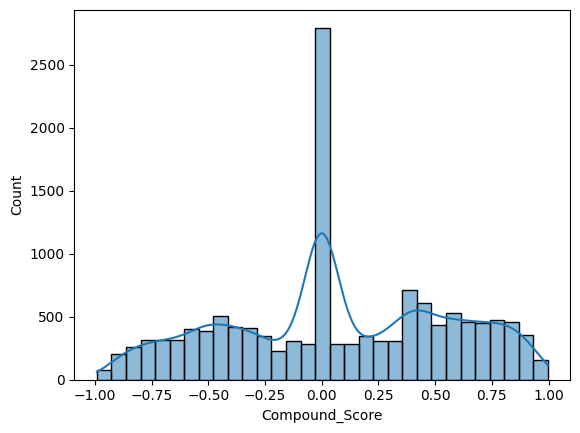

In [ ]:
#visualisasi
import matplotlib.pyplot as plt
import seaborn as sns
#visualisasi distribusi kolom numerik
sns.histplot(data['Compound_Score'], kde=True)
plt.show()

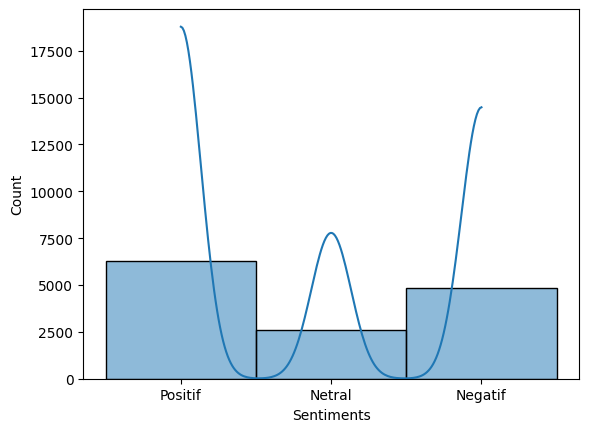

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

#visualisasi distribusi sentiment
sns.histplot(data['Sentiments'],kde=True)
plt.show()

In [ ]:
#Identifikasi pola, korelasi, hubungan dlm dataset
correlation_matrix=data.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()

ValueError: could not convert string to float: "allow the wife to use birth control pills even if it is on the doctor's recommendation for a second opinion, you need to consult a doctor if you know a doctor, ask the doctor, recommend that you be smart in choosing to use it"

In [ ]:
#Menghapus baris yang mengandung data kosong
df_cleaned = data.dropna()
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4596 entries, 0 to 4595
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            4596 non-null   int64  
 1   full_text_translated  4596 non-null   object 
 2   Compound_Score        4596 non-null   float64
 3   Sentiments            4596 non-null   object 
 4   full_text             4596 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 179.7+ KB


<ipython-input-8-c1fa7f4d2b17>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(x=sentiment_count.index, y=sentiment_count.values, palette='pastel')


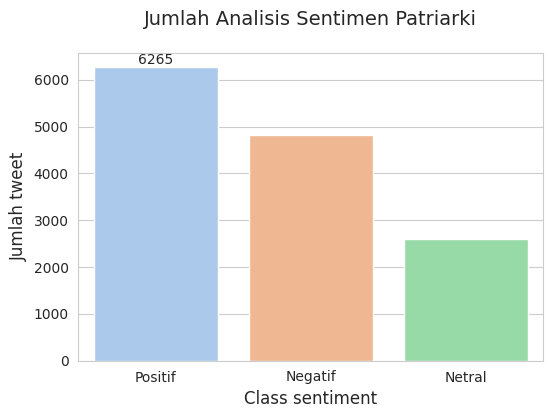

In [ ]:
#jumlah setiap sentiment
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#hitung jumlah tiap sentimen
sentiment_count = data['Sentiments'].value_counts()

#mengatur style plot
sns.set_style('whitegrid')

#membuat petak batang
fig, ax = plt.subplots(figsize=(6,4))
ax=sns.barplot(x=sentiment_count.index, y=sentiment_count.values, palette='pastel')
plt.title('Jumlah Analisis Sentimen Patriarki', fontsize=14, pad=20)
plt.xlabel('Class sentiment', fontsize=12)
plt.ylabel('Jumlah tweet', fontsize=12)

#tambahkan label di atas tiap batang
for i, count in enumerate(sentiment_count.values):
  ax.text(i,count+0.10, str(count), ha='center', va='bottom')

  plt.show()

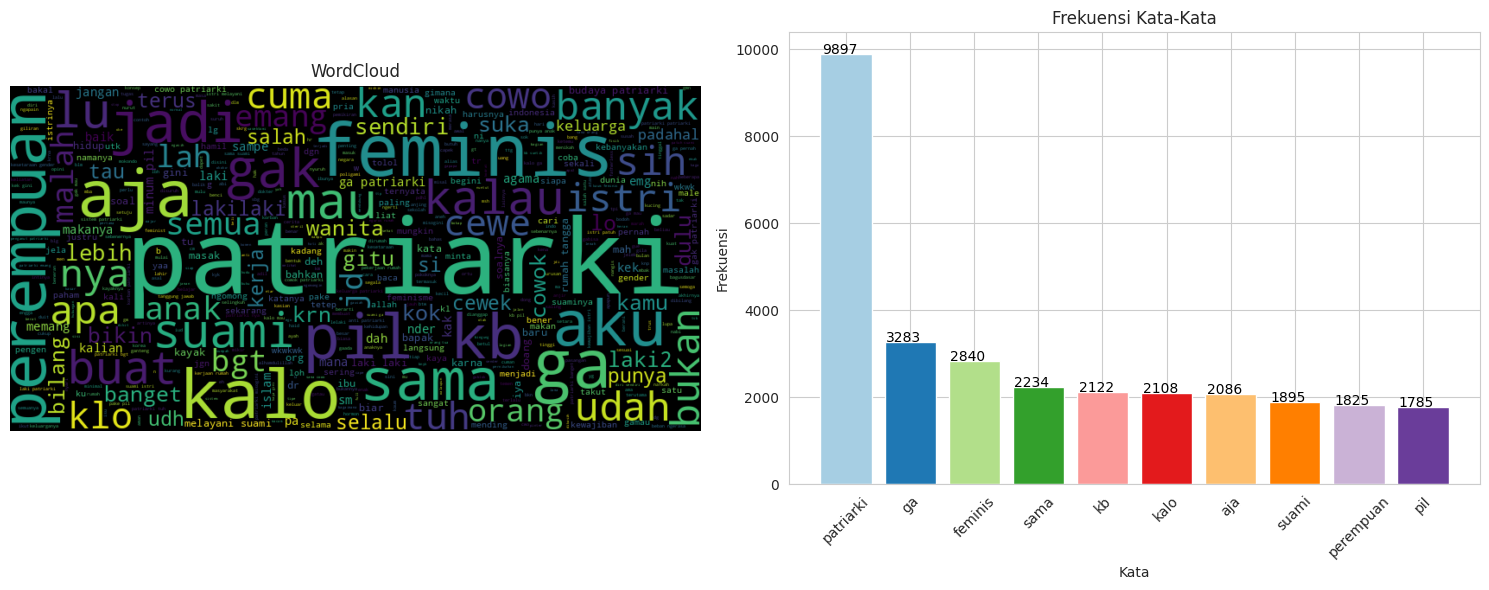

In [ ]:
#Wordcloud dan frekuensi kata-kata
import pandas as pd
import numpy as np
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
from collections import Counter

#ambil teks dari kolom '' dalam df
df = ' '.join(data['full_text'].tolist())

#hapus stopwords dan kata'kata tambahan
stopwords =set(STOPWORDS)
stopwords.update(['https','the','of','of','...','amp','t','co'] )

#membuat wordcloud
wc = WordCloud(stopwords=stopwords, background_color='black', max_words=500, width=800, height=400)
wc.generate(df)

#frekuensi kata
tokens = df.split()
word_counts = Counter(tokens)
top_words = word_counts.most_common(10) #jumlah kata di dalam chart
word, count = zip(*top_words)

#tampilkan wordCloud
plt.figure(figsize=(15,6))

#tampilan wordCloud
plt.subplot(1,2,1)
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud')

#tampilkan barchart frekuensi kata-kata
plt.subplot(1,2,2)
colors = plt.cm.Paired(range(len(word)))
bars = plt.bar(word,count,color=colors)
plt.xlabel('Kata')
plt.ylabel('Frekuensi')
plt.title("Frekuensi Kata-Kata")
plt.xticks(rotation=45)

#tambahkan label frekuensi di atas tiap bar
for bar, num in zip(bars, count):
  plt.text(bar.get_x() + bar.get_width()/2 - 0.1, num + 1, str(num), fontsize=10, color='black', ha='center')

plt.tight_layout()
plt.show()


In [ ]:
df_cleaned = data

In [ ]:
df_cleaned

,Unnamed: 0,full_text_translated,Compound_Score,Sentiments,full_text
0,0,allow the wife to use birth control pills even...,0.7269,Positif,mengijinkan istri menggunakan pil kb walaupun ...
1,1,I'm afraid the doctor will advise me to take b...,0.0314,Positif,pgn dokter takut disaranin minum pil kb lg mak...
2,2,"generation of birth control pills, birth contr...",0.0000,Netral,generasi pil kb suntik kb
3,3,The fool thinks that married couples have sex ...,-0.4956,Negatif,si tolol mengira pasangan menikah seks menggun...
4,4,Preventing pregnancy so that you don't get mor...,0.0772,Positif,mencegah biar ga hamilnambah anak gblk bukan c...
...,...,...,...,...,...
13687,13687,when will he show patriarchy hahaha,0.5574,Positif,kapan si nunjukin patriarki wkwk
13688,13688,"Thank God, I've had a boyfriend since high sch...",0.8547,Positif,alhamdulillah udah dr sma dpt temen cowok gak ...
13689,13689,It's true that extreme feminists are increasin...,0.5574,Positif,emang sjw feminis ekstrem makin hari makin ga ...
13690,13690,"big no, I really want to continue my career ev...",-0.1157,Negatif,big no emang mau tetep berkarir walaupun udh n...


# Support Vector Machine

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_cleaned['full_text'], df_cleaned['Sentiments'], test_size=0.1, random_state=42)

In [ ]:
print(f'Jumlah data latih: {len(X_train)}')
print(f'Jumlah data uji: {len(X_test)}')

Jumlah data latih: 4136
Jumlah data uji: 460


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

#Inisialisasi TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer()

#Transformasi daa teks menjadi vektor TF-IDF
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [ ]:
#Cetak nama fitur dari TF-IDF Vectorizer
feature_names = tfidf_vectorizer.get_feature_names_out()

#cetak bbrp contoh hasil transformasi dari data pelatihan
print("hasil transformasi dari data pelatihan:")
print(X_train_tfidf)

#cetak beberapa contoh fitur dari vektor TF-IDF
print("\nfitur dari vektor TF-IDF:")
print(feature_names)


hasil transformasi dari data pelatihan:
  (0, 4879)	0.3165126223950829
  (0, 7279)	0.11907263140747053
  (0, 8102)	0.2881854030136293
  (0, 21368)	0.274723643282936
  (0, 6901)	0.34943256186650856
  (0, 11307)	0.25213937139242787
  (0, 16838)	0.05090520347136977
  (0, 21005)	0.21690073095031945
  (0, 13758)	0.28505931086385355
  (0, 5376)	0.2632824301524384
  (0, 10927)	0.17497168384224104
  (0, 19086)	0.3348652565862353
  (0, 2281)	0.25096131846112324
  (0, 21621)	0.34943256186650856
  (0, 12921)	0.11572354682978891
  (1, 23422)	0.4454090765238854
  (1, 19740)	0.711943281065925
  (1, 9234)	0.2975345537495641
  (1, 19773)	0.43595511595491415
  (1, 16838)	0.12713711217819076
  (2, 1087)	0.9714719105693187
  (2, 16838)	0.23715464780349083
  (3, 12589)	0.19473499094240945
  (3, 19232)	0.09796526821276616
  (3, 1782)	0.13162821188242127
  :	:
  (12319, 23422)	0.7610844557392015
  (12319, 16838)	0.21724317021456832
  (12320, 10061)	0.5798725845367534
  (12320, 14292)	0.37809385864136724
  (

AttributeError: 'csr_matrix' object has no attribute 'dropna'

In [ ]:
#inisialisasi model SVM
svm_model = SVC(kernel='linear', random_state=42)

#melatih model dgn data pelatihan yang usdah divektorisasi
svm_model.fit(X_train_tfidf, y_train)

#cetak parameter model
print("Parameter model SVM:")
print(f"Kernel: {svm_model.kernel}")
print(f"C: {svm_model.C}")
print(f"Intercept: {svm_model.intercept_}")
print(f"Support Vectors: {svm_model.support_vectors_}")


Parameter model SVM:
Kernel: linear
C: 1.0
Intercept: [ 0.32525338 -0.10294923 -0.38947847]
Support Vectors:   (0, 2281)	0.25096131846112324
  (0, 4879)	0.3165126223950829
  (0, 5376)	0.2632824301524384
  (0, 6901)	0.34943256186650856
  (0, 7279)	0.11907263140747053
  (0, 8102)	0.2881854030136293
  (0, 10927)	0.17497168384224104
  (0, 11307)	0.25213937139242787
  (0, 12921)	0.11572354682978891
  (0, 13758)	0.28505931086385355
  (0, 16838)	0.05090520347136977
  (0, 19086)	0.3348652565862353
  (0, 21005)	0.21690073095031945
  (0, 21368)	0.274723643282936
  (0, 21621)	0.34943256186650856
  (1, 940)	0.08171247595961419
  (1, 1869)	0.21227231997620916
  (1, 1988)	0.2128044168788447
  (1, 2043)	0.12064398133527193
  (1, 2140)	0.2128044168788447
  (1, 2204)	0.20859018554157568
  (1, 3195)	0.1383869580579103
  (1, 3539)	0.13802530052696985
  (1, 4501)	0.2128044168788447
  (1, 6262)	0.10733770481804096
  :	:
  (10285, 11783)	0.21291676396212006
  (10285, 13837)	0.24376220521796407
  (10285, 168

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
#Menguji model pada data pengujian yang usdah divektorisasi
y_pred = svm_model.predict(X_test_tfidf)

#cetak bbrp contoh hasil prediksi
print("Contoh hasil prediksi pada data pengujian")
print(y_pred[:10])

Contoh hasil prediksi pada data pengujian
['Positif' 'Positif' 'Netral' 'Negatif' 'Positif' 'Negatif' 'Positif'
 'Positif' 'Negatif' 'Netral']


In [ ]:
#Evaluasi performa model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.68


In [ ]:
#Output classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

     Negatif       0.67      0.60      0.63       478
      Netral       0.66      0.62      0.64       255
     Positif       0.70      0.77      0.73       637

    accuracy                           0.68      1370
   macro avg       0.67      0.66      0.67      1370
weighted avg       0.68      0.68      0.68      1370



In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

#menghtung conf matrix
conf_matrix= confusion_matrix(y_test, y_pred)

#cetak confusion matrix
print("Confusion matrix: ")
print(conf_matrix)

Confusion matrix: 
[[286  42 150]
 [ 38 158  59]
 [105  41 491]]


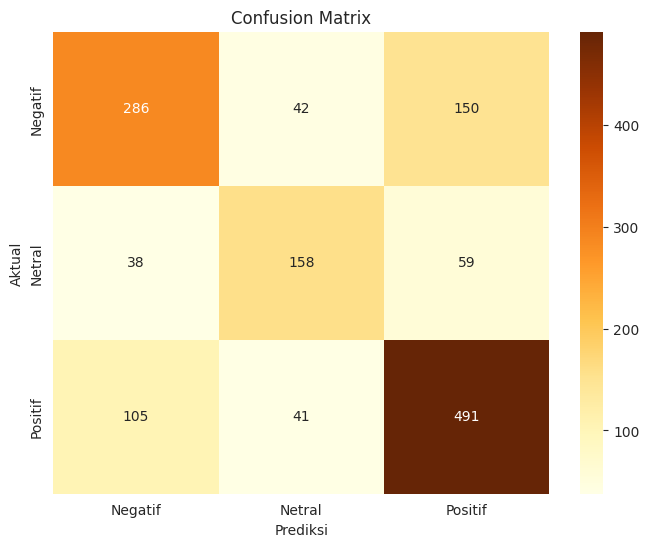

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='YlOrBr', xticklabels=['Negatif','Netral','Positif'], yticklabels=['Negatif','Netral','Positif'])
plt.title('Confusion Matrix')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.show()

CHATGPT

In [ ]:
pip install tensorflow scikit-learn

In [ ]:
df

,Unnamed: 0,full_text_translated,Compound_Score,Sentiments,full_text
0,0,allow the wife to use birth control pills even...,0.7269,Positif,mengijinkan istri menggunakan pil kb walaupun ...
1,1,I'm afraid the doctor will advise me to take b...,0.0314,Positif,pgn dokter takut disaranin minum pil kb lg mak...
2,2,"generation of birth control pills, birth contr...",0.0000,Netral,generasi pil kb suntik kb
3,3,The fool thinks that married couples have sex ...,-0.4956,Negatif,si tolol mengira pasangan menikah seks menggun...
4,4,Preventing pregnancy so that you don't get mor...,0.0772,Positif,mencegah biar ga hamilnambah anak gblk bukan c...
...,...,...,...,...,...
13687,13687,when will he show patriarchy hahaha,0.5574,Positif,kapan si nunjukin patriarki wkwk
13688,13688,"Thank God, I've had a boyfriend since high sch...",0.8547,Positif,alhamdulillah udah dr sma dpt temen cowok gak ...
13689,13689,It's true that extreme feminists are increasin...,0.5574,Positif,emang sjw feminis ekstrem makin hari makin ga ...
13690,13690,"big no, I really want to continue my career ev...",-0.1157,Negatif,big no emang mau tetep berkarir walaupun udh n...


Fitting 5 folds for each of 18 candidates, totalling 90 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


Fitting 5 folds for each of 5 candidates, totalling 25 fits


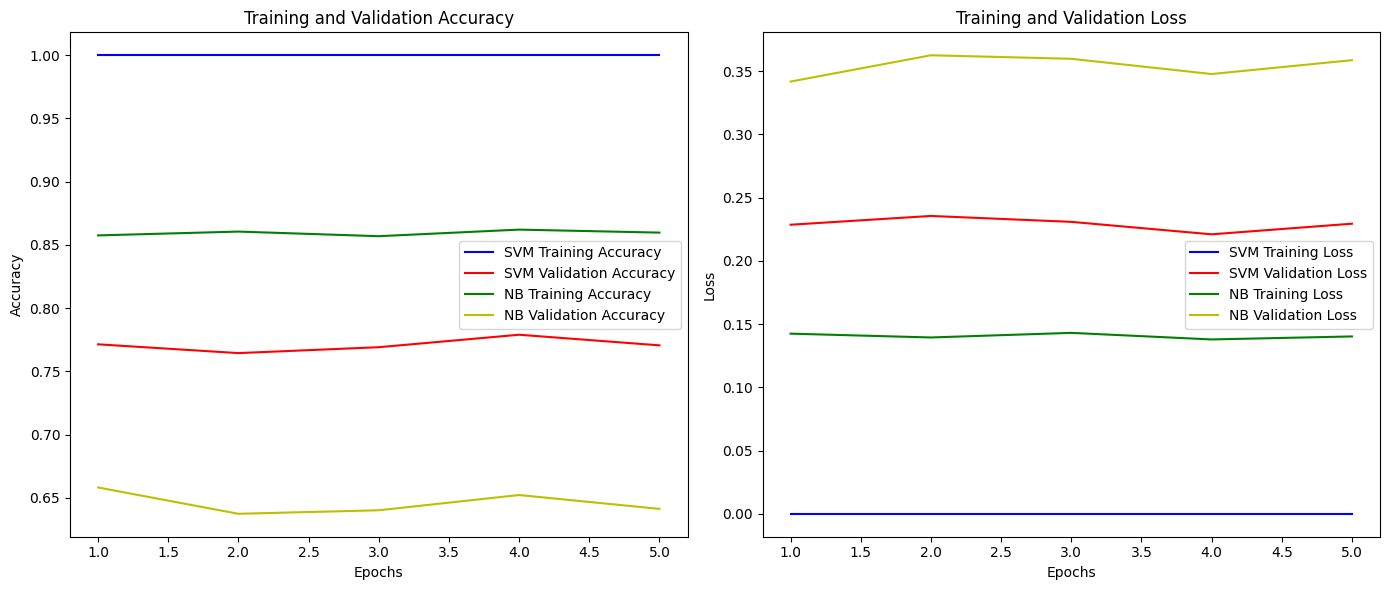

Best SVM Hyperparameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
SVM Classification Report:
               precision    recall  f1-score   support

     Negatif       0.75      0.71      0.73      4831
      Netral       0.81      0.72      0.76      2596
     Positif       0.77      0.84      0.81      6265

    accuracy                           0.77     13692
   macro avg       0.78      0.76      0.76     13692
weighted avg       0.77      0.77      0.77     13692


Best Naive Bayes Hyperparameters: {'alpha': 0.1}
Naive Bayes Classification Report:
               precision    recall  f1-score   support

     Negatif       0.67      0.59      0.63      4831
      Netral       0.77      0.30      0.43      2596
     Positif       0.62      0.83      0.71      6265

    accuracy                           0.65     13692
   macro avg       0.69      0.57      0.59     13692
weighted avg       0.67      0.65      0.63     13692



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import numpy as np

# Load dataset
file_path = '/content/drive/MyDrive/Colab Notebooks/dataset/Hasil-LabelingVaderSentiment.xlsx'
df = pd.read_excel(file_path)

# Drop rows with missing values in 'full_text_translated' or 'sentiment'
df = df.dropna(subset=['full_text_translated', 'Sentiments'])

# Encode sentiment labels
label_encoder = LabelEncoder()
df['sentiment_encoded'] = label_encoder.fit_transform(df['Sentiments'])

# Split the data
X = df['full_text_translated']
y = df['sentiment_encoded']

# Create TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Initialize classifiers
svm = SVC(probability=True)
nb = MultinomialNB()

# K-Fold Cross Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Hyperparameter tuning using GridSearchCV
svm_param_grid = {
    'kernel': ['linear', 'rbf', 'poly'],
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto']
}

nb_param_grid = {
    'alpha': [0.1, 0.5, 1.0, 5.0, 10.0]
}

svm_grid_search = GridSearchCV(SVC(), svm_param_grid, cv=kf, n_jobs=-1, verbose=1)
nb_grid_search = GridSearchCV(MultinomialNB(), nb_param_grid, cv=kf, n_jobs=-1, verbose=1)

# Transform data
X_tfidf = tfidf_vectorizer.fit_transform(X)

# Perform grid search
svm_grid_search.fit(X_tfidf, y)
nb_grid_search.fit(X_tfidf, y)

# Get the best models
best_svm = svm_grid_search.best_estimator_
best_nb = nb_grid_search.best_estimator_

# Function to evaluate model
def evaluate_model(model, X, y, kf):
    accuracy_train = []
    accuracy_val = []
    loss_train = []
    loss_val = []

    # To collect predictions for classification report
    y_val_true_all = []
    y_val_pred_all = []

    for train_index, val_index in kf.split(X):
        X_train, X_val = X[train_index], X[val_index]
        y_train, y_val = y[train_index], y[val_index]

        X_train_tfidf = tfidf_vectorizer.transform(X_train)
        X_val_tfidf = tfidf_vectorizer.transform(X_val)

        model.fit(X_train_tfidf, y_train)

        y_train_pred = model.predict(X_train_tfidf)
        y_val_pred = model.predict(X_val_tfidf)

        accuracy_train.append(accuracy_score(y_train, y_train_pred))
        accuracy_val.append(accuracy_score(y_val, y_val_pred))

        # Collect true and predicted labels for validation set
        y_val_true_all.extend(y_val)
        y_val_pred_all.extend(y_val_pred)

        # Calculate loss as the inverse of accuracy for simplicity
        loss_train.append(1 - accuracy_score(y_train, y_train_pred))
        loss_val.append(1 - accuracy_score(y_val, y_val_pred))

    # Generate classification report
    class_report = classification_report(y_val_true_all, y_val_pred_all, target_names=label_encoder.classes_)
    return accuracy_train, accuracy_val, loss_train, loss_val, class_report

# Evaluate best SVM
svm_acc_train, svm_acc_val, svm_loss_train, svm_loss_val, svm_class_report = evaluate_model(best_svm, X.values, y.values, kf)

# Evaluate best Naive Bayes
nb_acc_train, nb_acc_val, nb_loss_train, nb_loss_val, nb_class_report = evaluate_model(best_nb, X.values, y.values, kf)

# Plotting results
epochs = range(1, kf.get_n_splits() + 1)

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(epochs, svm_acc_train, 'b', label='SVM Training Accuracy')
plt.plot(epochs, svm_acc_val, 'r', label='SVM Validation Accuracy')
plt.plot(epochs, nb_acc_train, 'g', label='NB Training Accuracy')
plt.plot(epochs, nb_acc_val, 'y', label='NB Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, svm_loss_train, 'b', label='SVM Training Loss')
plt.plot(epochs, svm_loss_val, 'r', label='SVM Validation Loss')
plt.plot(epochs, nb_loss_train, 'g', label='NB Training Loss')
plt.plot(epochs, nb_loss_val, 'y', label='NB Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Print classification reports
print("Best SVM Hyperparameters:", svm_grid_search.best_params_)
print("SVM Classification Report:\n", svm_class_report)
print("\nBest Naive Bayes Hyperparameters:", nb_grid_search.best_params_)
print("Naive Bayes Classification Report:\n", nb_class_report)
